In [1]:
import pandas as pd
import numpy as np
import gensim
import gensim.downloader
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean as euc
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr as cor
from scipy.stats import spearmanr as spear

In [2]:
def get_core_index(s):
    tokens = s.split(' ')
    if len(tokens) == 3:
        return 2
    elif tokens[-2:] == ['someone','is']:
        if len(tokens) == 4:
            return 2
        elif tokens[-3] in ['with','to','at','towards','upon','on']:
            if len(tokens) == 5 or len(tokens) == 6:
                return 2
    else:
        return None

In [3]:
import gensim

#w2v = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/GoogleNews-vectors-negative300.bin', binary=True)
w2v = gensim.downloader.load('word2vec-google-news-300')

hi_e = np.mean([w2v['good'],w2v['clean'],w2v['beautiful']], axis=0)
lo_e = np.mean([w2v['bad'],w2v['dirty'],w2v['ugly']], axis=0)

hi_p = np.mean([w2v['powerful'],w2v['big'],w2v['strong']], axis=0)
lo_p = np.mean([w2v['powerless'],w2v['small'],w2v['weak']], axis=0)

hi_a = np.mean([w2v['young'],w2v['active'],w2v['loud']], axis=0)
lo_a = np.mean([w2v['old'],w2v['inactive'],w2v['quiet']], axis=0)

In [4]:
dists_e = []
dists_p = []
dists_a = []

E = []
P = []
A = []

np.random.seed(8675309)
epas_old = pd.read_csv('EPA_dict.csv').sample(frac=1).reset_index(drop=True)

for index, row in epas_old.iterrows():
    s = row['Concept']
    i = get_core_index(s)
    if i:
        w = s.split(' ')[i-1]
        if w in w2v:
            x = w2v[w]
            dists_e.append(euc(x,lo_e)-euc(x,hi_e))
            dists_p.append(euc(x,lo_p)-euc(x,hi_p))
            dists_a.append(euc(x,lo_a)-euc(x,hi_a))
            E.append(row['E_mean'])
            P.append(row['P_mean'])
            A.append(row['A_mean'])
        #else:
            #print(s,w)

print(spear(dists_e, E))
print(spear(dists_p, P))
print(spear(dists_a, A))

print(cor(dists_e, E))
print(cor(dists_p, P))
print(cor(dists_a, A))

SpearmanrResult(correlation=0.7305080429055194, pvalue=0.0)
SpearmanrResult(correlation=0.5156680510027237, pvalue=4.3460371836358066e-142)
SpearmanrResult(correlation=0.2129945864399244, pvalue=7.934391852067022e-23)
(0.7117669919291485, 4.94e-322)
(0.5540200825759738, 3.826444886977019e-168)
(0.25474687774952554, 2.947305863193319e-32)


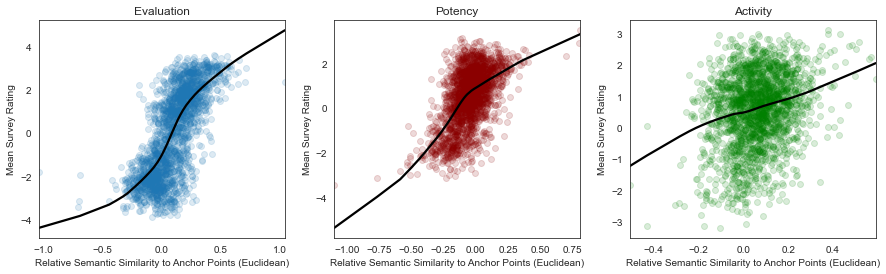

In [5]:
sb.set_style("white")

fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15,4))

sb.regplot(x=dists_e, y=E, lowess=True,ax=axes[0],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15})
axes[0].set_xlabel("Relative Semantic Similarity to Anchor Points (Euclidean)")
axes[0].set_ylabel("Mean Survey Rating")
axes[0].set_title("Evaluation")

sb.regplot(x=dists_p, y=P, lowess=True,ax=axes[1],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15,"color":"darkred"})
axes[1].set_xlabel("Relative Semantic Similarity to Anchor Points (Euclidean)")
axes[1].set_ylabel("Mean Survey Rating")
axes[1].set_title("Potency")

sb.regplot(x=dists_a, y=A, lowess=True,ax=axes[2],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15, "color": "green"})
axes[2].set_xlabel("Relative Semantic Similarity to Anchor Points (Euclidean)")
axes[2].set_ylabel("Mean Survey Rating")
axes[2].set_title("Activity")

plt.show()

In [6]:
dists_e = []
dists_p = []
dists_a = []

E = []
P = []
A = []

np.random.seed(8675309)
epas_old = pd.read_csv('EPA_dict.csv').sample(frac=1).reset_index(drop=True)

for index, row in epas_old.iterrows():
    s = row['Concept']
    i = get_core_index(s)
    if i:
        w = s.split(' ')[i-1]
        if w in w2v:
            x = w2v[w]
            dists_e.append(cosine(x,lo_e)-cosine(x,hi_e))
            dists_p.append(cosine(x,lo_p)-cosine(x,hi_p))
            dists_a.append(cosine(x,lo_a)-cosine(x,hi_a))
            E.append(row['E_mean'])
            P.append(row['P_mean'])
            A.append(row['A_mean'])
        #else:
            #print(s,w)

print(spear(dists_e, E))
print(spear(dists_p, P))
print(spear(dists_a, A))

print(cor(dists_e, E))
print(cor(dists_p, P))
print(cor(dists_a, A))

SpearmanrResult(correlation=0.7206476737102773, pvalue=0.0)
SpearmanrResult(correlation=0.5105806684410187, pvalue=7.070988796169527e-139)
SpearmanrResult(correlation=0.20771922960023984, pvalue=9.142238380556892e-22)
(0.7083212141388506, 1.4464513e-317)
(0.5473747125435503, 2.1979557254379433e-163)
(0.2436725823857128, 1.4182963426860246e-29)


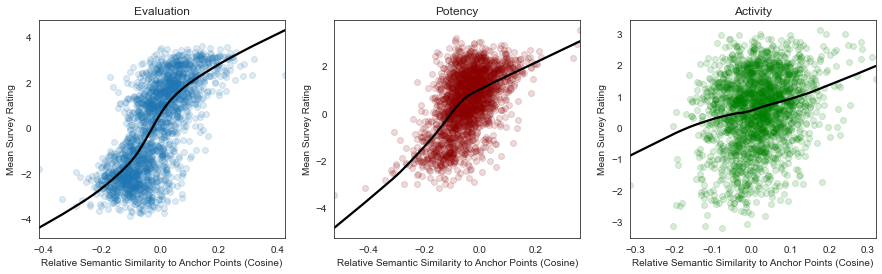

In [7]:
sb.set_style("white")

fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15,4))

sb.regplot(x=dists_e, y=E, lowess=True,ax=axes[0],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15})
axes[0].set_xlabel("Relative Semantic Similarity to Anchor Points (Cosine)")
axes[0].set_ylabel("Mean Survey Rating")
axes[0].set_title("Evaluation")

sb.regplot(x=dists_p, y=P, lowess=True,ax=axes[1],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15,"color":"darkred"})
axes[1].set_xlabel("Relative Semantic Similarity to Anchor Points (Cosine)")
axes[1].set_ylabel("Mean Survey Rating")
axes[1].set_title("Potency")

sb.regplot(x=dists_a, y=A, lowess=True,ax=axes[2],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15, "color": "green"})
axes[2].set_xlabel("Relative Semantic Similarity to Anchor Points (Cosine)")
axes[2].set_ylabel("Mean Survey Rating")
axes[2].set_title("Activity")

plt.show()

In [8]:
import itertools

anchors = {'E': [('good','evil'),
                 ('clean','dirty'),
                 ('beautiful','ugly'),
                 ('nice','awful'),
                 ('honest','dishonest'),
                 ('heavenly','hellish'),
                 ('fair','unfair'),
                 ('pleasant','unpleasant'),
                 ('positive','negative'),
                 ('kind','cruel')],
           'P': [('strong','weak'),
                 ('large','small'),
                 ('heavy','light'),
                 ('many','few'),
                 ('powerful','powerless'),
                 ('difficult','easy'),
                 ('big','small'),
                 ('thick','thin'),
                 ('complex','simple'),
                 ('deep','shallow')],
           'A': [('hot','cold'),
                 ('fast','slow'),
                 ('young','old'),
                 ('noisy','quiet'),
                 ('intense','calm'),
                 ('sharp','dull'),
                 ('burning','freezing'),
                 ('active','inactive'),
                 ('loud','quiet'),
                 ('loose','firm')]}
           
ds = ['E','P','A']

corrs = {d:{n:[] for n in range(1,11)} for d in ds}

ws = []

for s in epas_old['Concept']:
    i = get_core_index(s)
    if i:
        w = s.split(' ')[i-1]
        if w in w2v:
            ws.append(w2v[w])

In [9]:
for d in ds:
    anchor_vecs_all = [(w2v[a[0]],w2v[a[1]]) for a in anchors[d]]
    if d == "E":
        Y = E
    elif d == "P":
        Y = P
    else:
        Y = A
    for n in range(1,11):
        for anchor_n in itertools.combinations(range(len(anchor_vecs_all)),n):

            anchor_words = set([anchors[d][i] for i in anchor_n])
            anchor_vecs =  [anchor_vecs_all[i] for i in anchor_n]

            mean_hi = np.mean([a[0] for a in anchor_vecs],axis=0)
            mean_lo = np.mean([a[1] for a in anchor_vecs], axis=0)

            dists = [cosine(mean_lo,w) - cosine(mean_hi,w) for w in ws]

            corrs[d][n].append((cor(dists,Y)[0],anchor_words))
    print('{} is complete!'.format(d))

E is complete!
P is complete!
A is complete!


In [10]:
for d in ds:
    max = (0,'')
    for n in range(1,11):
        for x in corrs[d][n]:
            if x[0] > max[0]:
                max = x
    print('{}: {}'.format(d,max))

E: (0.741268277826115, {('beautiful', 'ugly'), ('clean', 'dirty'), ('fair', 'unfair'), ('honest', 'dishonest'), ('positive', 'negative')})
P: (0.6078391775550807, {('powerful', 'powerless'), ('deep', 'shallow'), ('strong', 'weak')})
A: (0.4550538537323431, {('loud', 'quiet'), ('sharp', 'dull'), ('fast', 'slow'), ('hot', 'cold')})


In [11]:
for d in ds:
    print('{}: {}'.format(d,corrs[d][10][0][0]))

E: 0.705206195079257
P: 0.42211890758822057
A: 0.3469646559673834


In [12]:
for d in ds:
    print(d)
    for i in corrs[d][1]:
        print(i[1],i[0])

E
{('good', 'evil')} 0.3259459931424456
{('clean', 'dirty')} 0.5418262965385083
{('beautiful', 'ugly')} 0.581502062585876
{('nice', 'awful')} 0.47160900324488436
{('honest', 'dishonest')} 0.5900981610170062
{('heavenly', 'hellish')} 0.42105044022347893
{('fair', 'unfair')} 0.5584682241098551
{('pleasant', 'unpleasant')} 0.5731937563664045
{('positive', 'negative')} 0.6391724096481028
{('kind', 'cruel')} 0.4236332061235155
P
{('strong', 'weak')} 0.5647150934074336
{('large', 'small')} 0.053544798019592554
{('heavy', 'light')} -0.15554472998989355
{('many', 'few')} -0.06088442596666786
{('powerful', 'powerless')} 0.46568574585354305
{('difficult', 'easy')} -0.005553082523033579
{('big', 'small')} -0.012814595811068856
{('thick', 'thin')} 0.09970518553692706
{('complex', 'simple')} 0.00942200602925818
{('deep', 'shallow')} 0.37164438537601735
A
{('hot', 'cold')} 0.23401922291058658
{('fast', 'slow')} 0.24023421015575613
{('young', 'old')} -0.03280493918191825
{('noisy', 'quiet')} 0.211031

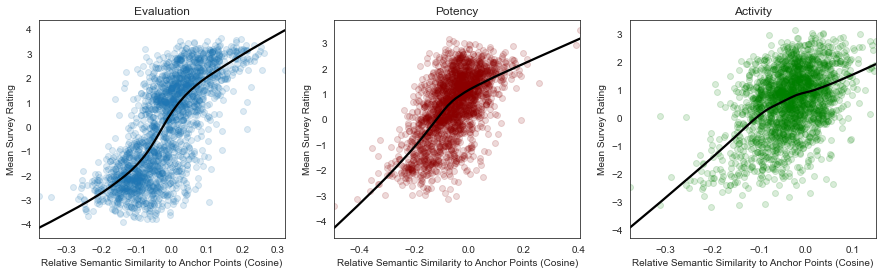

In [13]:
hi_e = np.mean([w2v[x] for x in ['positive','beautiful','fair','honest','clean']], axis=0)
lo_e = np.mean([w2v[x] for x in ['negative','ugly','fair','unfair','dishonest','dirty']], axis=0)

hi_p = np.mean([w2v[x] for x in ['deep','strong','powerful']], axis=0)
lo_p = np.mean([w2v[x] for x in ['shallow','weak','powerless']], axis=0)

hi_a = np.mean([w2v[x] for x in ['hot','sharp','loud','fast']], axis=0)
lo_a = np.mean([w2v[x] for x in ['cold','dull','quiet','slow']], axis=0)

dists_e = []
dists_p = []
dists_a = []

E = []
P = []
A = []

np.random.seed(8675309)
epas_old = pd.read_csv('EPA_dict.csv').sample(frac=1).reset_index(drop=True)

for index, row in epas_old.iterrows():
    s = row['Concept']
    i = get_core_index(s)
    if i:
        w = s.split(' ')[i-1]
        if w in w2v:
            x = w2v[w]
            dists_e.append(cosine(x,lo_e)-cosine(x,hi_e))
            dists_p.append(cosine(x,lo_p)-cosine(x,hi_p))
            dists_a.append(cosine(x,lo_a)-cosine(x,hi_a))
            E.append(row['E_mean'])
            P.append(row['P_mean'])
            A.append(row['A_mean'])
        #else:
            #print(s,w)
            
sb.set_style("white")

fig, axes = plt.subplots(1, 3, sharex=False, figsize=(15,4))

sb.regplot(x=dists_e, y=E, lowess=True,ax=axes[0],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15})
axes[0].set_xlabel("Relative Semantic Similarity to Anchor Points (Cosine)")
axes[0].set_ylabel("Mean Survey Rating")
axes[0].set_title("Evaluation")

sb.regplot(x=dists_p, y=P, lowess=True,ax=axes[1],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15,"color":"darkred"})
axes[1].set_xlabel("Relative Semantic Similarity to Anchor Points (Cosine)")
axes[1].set_ylabel("Mean Survey Rating")
axes[1].set_title("Potency")

sb.regplot(x=dists_a, y=A, lowess=True,ax=axes[2],
          line_kws={"color":"black"},
          scatter_kws={"alpha":0.15, "color": "green"})
axes[2].set_xlabel("Relative Semantic Similarity to Anchor Points (Cosine)")
axes[2].set_ylabel("Mean Survey Rating")
axes[2].set_title("Activity")

plt.show()